<a href="https://colab.research.google.com/github/grecoserafim/suicide_pandas_seaborn/blob/main/Suicide_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

Apresentar dataset

In [2]:
df = pd.read_csv('master.csv')
df.head(266)
#dataset.shapea
#display(df)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,6.71,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.19,Albania1987,NaN,"2,15,66,24,900",796.0,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.83,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.59,Albania1987,NaN,"2,15,66,24,900",796.0,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.28,Albania1987,NaN,"2,15,66,24,900",796.0,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
261,Albania,2010,female,15-24 years,6.0,263581,2.28,Albania2010,0.722,"11,92,69,53,259",4359.0,Millenials
262,Albania,2010,female,5-14 years,2.0,223969,0.89,Albania2010,0.722,"11,92,69,53,259",4359.0,Generation Z
263,Albania,2010,male,5-14 years,0.0,240939,0.00,Albania2010,0.722,"11,92,69,53,259",4359.0,Generation Z
264,Antigua and Barbuda,1985,female,15-24 years,0.0,7709,0.00,Antigua and Barbuda1985,NaN,"24,09,23,926",3850.0,Generation X


Numero de paises existentes no dataset

In [3]:
países = df["country"].unique()

## [Tonet] Sugiro deixar essa lista de países ordenadas alfabeticamente.
## [Tonet] Isso facilita quando for plotar ou orientar sua análise visual.
## [Tonet] Evite colocar acento nos nomes das variávies/objetos.

# conte o número de países únicos
número_de_países = len(países)

print("Lista de países: ", países)
print("Número total de países: ", número_de_países)

Lista de países:  ['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelles' 'Singapore' 'Slovakia' '

Quais anos o dataset explora

In [4]:
ano = df["year"].unique()
ano.sort()

# conte o número de países únicos
número_de_anos = len(ano)

print("Lista de anos: ", ano)
print("Número total de anos: ", número_de_anos)

Lista de anos:  [1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017 2018 2019 2020]
Número total de anos:  36


Quais faixas etárias que o dataset explora

In [5]:
faixa_etária = df["age"].unique()
faixa_etária.sort()

# conte o número de países únicos
número_de_faixa_etária = len(faixa_etária)

print("Lista de faixa etária: ", faixa_etária)
print("Número total de anos: ", número_de_faixa_etária)

Lista de faixa etária:  ['15-24 years' '25-34 years' '35-54 years' '5-14 years' '55-74 years'
 '75+ years']
Número total de anos:  6


# Pergunta:  O numero de suicidio de homens sempre é maior que mulheres, em todos os países?

In [6]:
# agrupe os dados por país e sexo (homem ou mulher)
grupos = df.groupby(["country", "sex"])

# aplique a soma a cada grupo e armazene o resultado em uma nova variável



suicidio_por_genero = grupos["suicides_no"].sum().reset_index()

print(suicidio_por_genero)

                      country     sex  suicides_no
0                     Albania  female        693.0
1                     Albania    male       1277.0
2         Antigua and Barbuda  female          1.0
3         Antigua and Barbuda    male         10.0
4                   Argentina  female      20145.0
..                        ...     ...          ...
223  United States of America    male      31375.0
224                   Uruguay  female       3268.0
225                   Uruguay    male      11990.0
226                Uzbekistan  female      11744.0
227                Uzbekistan    male      30072.0

[228 rows x 3 columns]


In [20]:
grupos = df.groupby(["country", "sex"]).sum()

# desfaça o agrupamento para ter acesso aos dados em formato de tabela
grupos = grupos.reset_index()

# crie uma nova tabela pivô para facilitar a comparação entre homens e mulheres
suicide_genre_total = grupos.pivot(index="country", columns="sex", values="suicides/100k pop")

# filtre apenas aqueles países onde o número para mulheres é maior do que para homens
países_com_mais_mulheres = suicide_genre_total[suicide_genre_total["female"] > suicide_genre_total["male"]]

print("Países com maior suicídio de mulheres:", países_com_mais_mulheres.index.tolist())

Países com maior suicídio de mulheres: ['Maldives']


In [11]:
display(suicide_genre_total)

sex,female,male
country,,
Albania,318.980000,605.780000
Antigua and Barbuda,15.620000,163.520000
Argentina,710.139942,3206.278268
Armenia,240.291407,741.278616
Aruba,276.350000,1320.170000
...,...,...
United Kingdom,638.211200,2175.922643
United States,869.810000,4271.160000
United States of America,9.104060,9.567481


In [18]:
count = 0
for index, row in suicide_genre_total.iterrows():
    if row['female'] > row['male']:
        count += 1

print(count)

1


Apenas um país obteve esse resultado, mas vamos fazer um estudo mais a fundo.

Média,Mediana,Desvio Padrão e Variancia

In [13]:
media_suicidio = suicide_genre_total.iloc[:].mean()
print(media_suicidio)
print("-----------------------------------------------------------")
mediana_suicidio = suicide_genre_total.iloc[:].median()
print(mediana_suicidio)
print("-----------------------------------------------------------")
desviopadrao_suicidio = suicide_genre_total.iloc[:].std()
print(desviopadrao_suicidio)

sex
female     701.754276
male      2562.057098
dtype: float64
-----------------------------------------------------------
sex
female     402.836160
male      1825.025169
dtype: float64
-----------------------------------------------------------
sex
female     855.309353
male      2530.035799
dtype: float64


# Suicidio de Homens sempre maior que de Mulheres apenas em Maldives? E se fizermos por faixa etária

Conferindo se o numero de mulheres em algum momento na faixa étaria de 15-24 supera em algum pais os homens

In [15]:

# selecionar apenas as linhas da faixa etária específica
df_15 = df[df['age'] == '15-24 years']

# agrupar os dados por gênero e calcular a média dos valores

# itera sobre cada país e ano
for (pais, ano), data in df_15.groupby(['country', 'year']):
    # selecionar os valores de homens e mulheres
    df_15_male = data[data['sex'] == 'male']['suicides/100k pop'].values[0]
    df_15_female = data[data['sex'] == 'female']['suicides/100k pop'].values[0]

    # comparar os valores de homens e mulheres
    if df_15_female > df_15_male:
        print(f"No país {pais} e no ano {ano}, o valor para mulheres é maior que o valor para homens na faixa etária específica")





No país Albania e no ano 1995, o valor para mulheres é maior que o valor para homens na faixa etária específica
No país Albania e no ano 2000, o valor para mulheres é maior que o valor para homens na faixa etária específica
No país Albania e no ano 2004, o valor para mulheres é maior que o valor para homens na faixa etária específica
No país Albania e no ano 2007, o valor para mulheres é maior que o valor para homens na faixa etária específica
No país Albania e no ano 2008, o valor para mulheres é maior que o valor para homens na faixa etária específica
No país Armenia e no ano 2015, o valor para mulheres é maior que o valor para homens na faixa etária específica
No país Armenia e no ano 2017, o valor para mulheres é maior que o valor para homens na faixa etária específica
No país Aruba e no ano 2004, o valor para mulheres é maior que o valor para homens na faixa etária específica
No país Aruba e no ano 2005, o valor para mulheres é maior que o valor para homens na faixa etária específ

foi observado que na faixa etária de 15-24 anos existem varios
casos em um ano especifico e num país especifico o numero de suicidio de mulheres proporcional a 100mil habitantes  superou o de homens 

vamos criar um dataset para maior visualização de todos os casos em faixa etária que isso ocorre

In [22]:
# criar uma lista vazia para armazenar as informações
resultados = []

# itera sobre cada país, ano e faixa etária
for (pais, ano, faixa_etaria), data in df.groupby(['country', 'year', 'age']):
    # selecionar os valores de homens e mulheres
    homens = data[data['sex'] == 'male']['suicides/100k pop'].values[0]
    if len(data[data['sex'] == 'female']['suicides/100k pop'].values) > 0: 
      mulheres = data[data['sex'] == 'female']['suicides/100k pop'].values[0] 
    else: 
      mulheres = 0

    # comparar os valores de homens e mulheres
    if mulheres > homens:
        resultados.append((pais, ano, faixa_etaria))

# criar um novo DataFrame com as informações armazenadas na lista resultados
relação_homem_mulher_df = pd.DataFrame(resultados, columns=['country', 'year', 'age'])
relação_homem_mulher_df.head(10)







,country,year,age
0,Albania,1988,25-34 years
1,Albania,1988,75+ years
2,Albania,1993,5-14 years
3,Albania,1995,15-24 years
4,Albania,1995,75+ years
5,Albania,1997,5-14 years
6,Albania,1999,5-14 years
7,Albania,2000,15-24 years
8,Albania,2000,35-54 years
9,Albania,2000,75+ years


Com esse dataset criado, mostra o país, ano e faixa etária que o numero de suicidio de mulheres por 100mil habitantes é superior ao do homem

In [23]:
display(relação_homem_mulher_df)

,country,year,age
0,Albania,1988,25-34 years
1,Albania,1988,75+ years
2,Albania,1993,5-14 years
3,Albania,1995,15-24 years
4,Albania,1995,75+ years
...,...,...,...
820,Uzbekistan,2013,15-24 years
821,Uzbekistan,2014,15-24 years
822,Uzbekistan,2017,15-24 years
823,Uzbekistan,2018,15-24 years


Geração que maior numeros de suicidios bruto

In [24]:
df_geração = df[df['suicides/100k pop'] != 0]

# agrupar os dados por coluna de tipo
grouped = df.groupby('generation')

# contar o número de ocorrências de cada tipo
geração_suicidio = grouped.size().reset_index(name='contagem')

# ordenar os resultados pela contagem em ordem decrescente
geração_suicidio = geração_suicidio.sort_values('contagem', ascending=False)

In [ ]:
display(resultado)

,generation,contagem
2,Generation X,7720
5,Silent,7020
4,Millenials,5844
0,Boomers,5646
1,G.I. Generation,4056
3,Generation Z,1470


In [27]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

Text(0, 0.5, 'Produto Interno Bruto per capita')

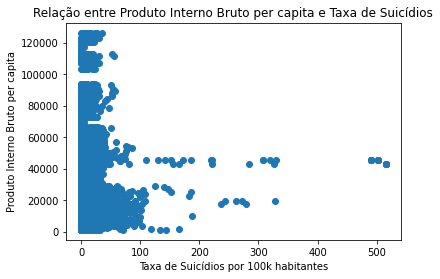

In [28]:
df_filtered = df[(df["year"] >= 2010) & (df["year"] <= 2020)]

plt.scatter(df_filtered["suicides/100k pop"], df_filtered["gdp_per_capita ($)"])

# Adicionar título e rótulos de eixos
plt.title("Relação entre Produto Interno Bruto per capita e Taxa de Suicídios")
plt.xlabel("Taxa de Suicídios por 100k habitantes")
plt.ylabel("Produto Interno Bruto per capita")


Text(0, 0.5, 'Produto Interno Bruto per capita')

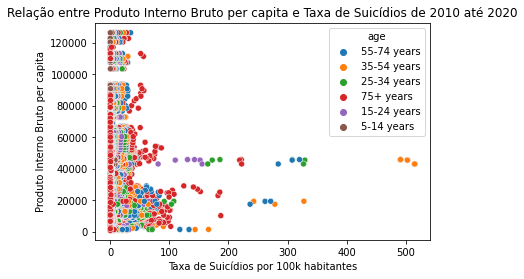

In [29]:
df_filtered = df[(df["year"] >= 2010) & (df["year"] <= 2020)]

coluna_para_cor = "age"

sns.scatterplot(x="suicides/100k pop", y="gdp_per_capita ($)", hue=coluna_para_cor, data=df_filtered)


# Adicionar título e rótulos de eixos
plt.title("Relação entre Produto Interno Bruto per capita e Taxa de Suicídios de 2010 até 2020")
plt.xlabel("Taxa de Suicídios por 100k habitantes")
plt.ylabel("Produto Interno Bruto per capita")

<ipython-input-34-dcef120b399b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["nova_categoria"] = None
/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Text(0, 0.5, 'Produto Interno Bruto per capita')

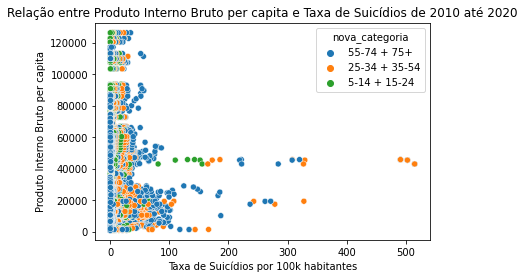

In [34]:

df_filtered = df[(df["year"] >= 2010) & (df["year"] <= 2020)]
df_filtered["nova_categoria"] = None


df_filtered.loc[(df_filtered["age"] == "5-14 years") | (df_filtered["age"] == "15-24 years"), "nova_categoria"] = "5-14 + 15-24"
df_filtered.loc[(df_filtered["age"] == "25-34 years") | (df_filtered["age"] == "35-54 years"), "nova_categoria"] = "25-34 + 35-54"
df_filtered.loc[(df_filtered["age"] == "55-74 years") | (df_filtered["age"] == "75+ years"), "nova_categoria"] = "55-74 + 75+"


coluna_para_cor = "nova_categoria"

sns.scatterplot(x="suicides/100k pop", y="gdp_per_capita ($)", hue=coluna_para_cor, data=df_filtered)


# Adicionar título e rótulos de eixos
plt.title("Relação entre Produto Interno Bruto per capita e Taxa de Suicídios de 2010 até 2020")
plt.xlabel("Taxa de Suicídios por 100k habitantes")
plt.ylabel("Produto Interno Bruto per capita")